In [7]:
import matplotlib.pyplot as plt
import numpy as np
from protozfits.simple import File
from pedestal import PedestalSimple, remove_pedestal
from event import Event
from tools import plot_hist

## Calibration with file "Run021.1.fits.fz"

In [2]:
N1 = 40000
f1 = File("../data/Run021.1.fits.fz")
ped = PedestalSimple()
for i in range(0, N1):
    ev = next(f1.Events)
    Ev = Event(ev)
    Ev.read()
    ped.fill_pedestal_event(Ev)

ped.finalize_pedestal()
print("Finish calcurate pedestal")

Finish calcurate pedestal


## Substract pedestal for "Run026.1.fits.fz"

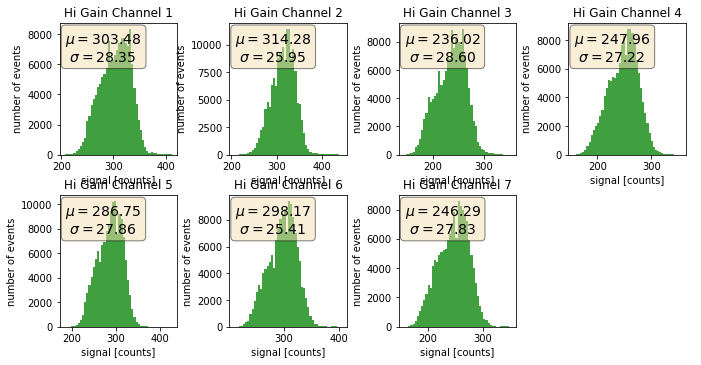

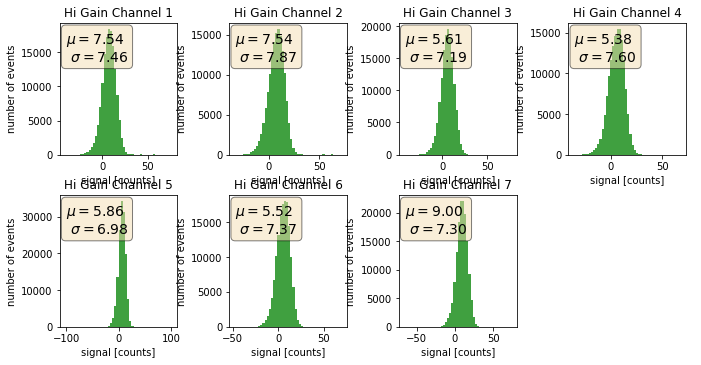

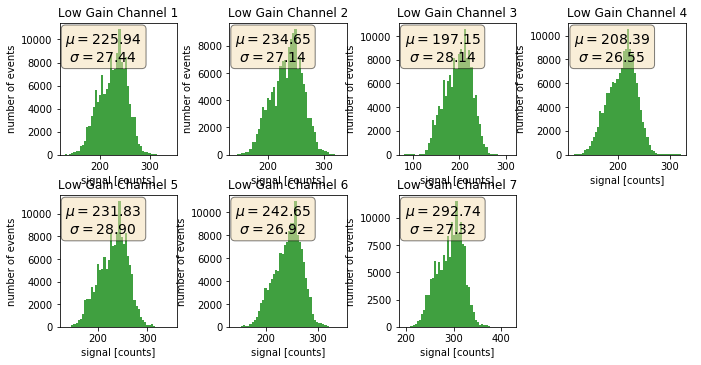

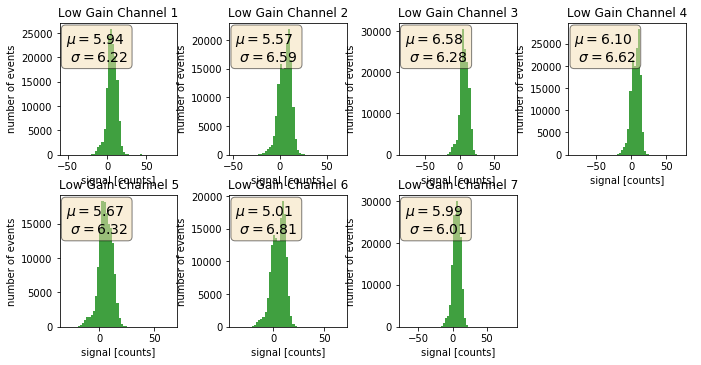

In [18]:
f2 = File("../data/Run026.1.fits.fz")
N2 = 4000
event_hi_gain_before_remove_pedestal = np.zeros((N2, 8, 40))
event_hi_gain_after_remove_pedestal = np.zeros((N2, 8, 40))
event_low_gain_before_remove_pedestal = np.zeros((N2, 8, 40))
event_low_gain_after_remove_pedestal = np.zeros((N2, 8, 40))

for i in range(0, N2):
    ev = next(f2.Events)
    Ev = Event(ev)
    Ev.read()
    event_hi_gain_before_remove_pedestal[i, :, :] = Ev.samples_high_gain
    event_low_gain_before_remove_pedestal[i, :, :] = Ev.samples_low_gain
    remove_pedestal(Ev, ped)
    event_hi_gain_after_remove_pedestal[i, :, :] = Ev.samples_high_gain
    event_low_gain_after_remove_pedestal[i, :, :] = Ev.samples_low_gain

%matplotlib inline
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = [10, 5]
plot_hist(event_hi_gain_before_remove_pedestal, "Hi Gain")
plot_hist(event_hi_gain_after_remove_pedestal, "Hi Gain")
plot_hist(event_low_gain_before_remove_pedestal, "Low Gain")
plot_hist(event_low_gain_after_remove_pedestal, "Low Gain")
plt.show()

## Substract pedestal for "Run027.1.fits.fz"

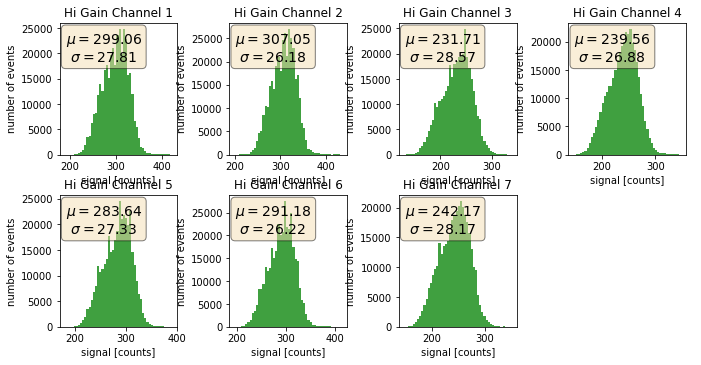

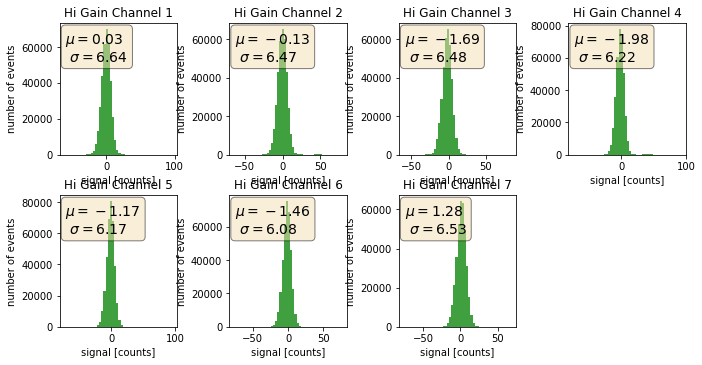

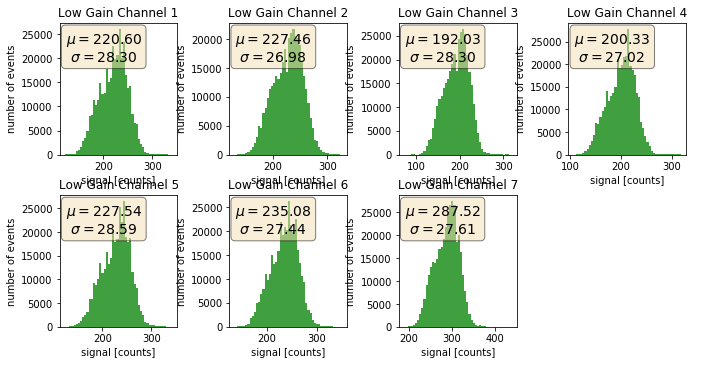

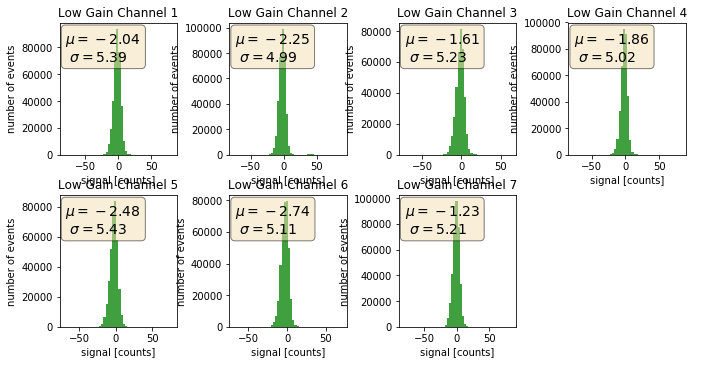

In [19]:
f3 = File("../data/Run027.1.fits.fz")
N3 = 10000
event_hi_gain_before_remove_pedestal = np.zeros((N3, 8, 40))
event_hi_gain_after_remove_pedestal = np.zeros((N3, 8, 40))
event_low_gain_before_remove_pedestal = np.zeros((N3, 8, 40))
event_low_gain_after_remove_pedestal = np.zeros((N3, 8, 40))

for i in range(0, N3):
    ev = next(f3.Events)
    Ev = Event(ev)
    Ev.read()
    event_hi_gain_before_remove_pedestal[i, :, :] = Ev.samples_high_gain
    event_low_gain_before_remove_pedestal[i, :, :] = Ev.samples_low_gain
    remove_pedestal(Ev, ped)
    event_hi_gain_after_remove_pedestal[i, :, :] = Ev.samples_high_gain
    event_low_gain_after_remove_pedestal[i, :, :] = Ev.samples_low_gain

%matplotlib inline
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = [10, 5]
plot_hist(event_hi_gain_before_remove_pedestal, "Hi Gain")
plot_hist(event_hi_gain_after_remove_pedestal, "Hi Gain")
plot_hist(event_low_gain_before_remove_pedestal, "Low Gain")
plot_hist(event_low_gain_after_remove_pedestal, "Low Gain")
plt.show()